# Week 13 Homework
### Supervised Learning

In [1]:
# Dependencies and modules:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from pprint import pp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
 
# bottle.csv file:
bottle_df = pd.read_csv("bottle.csv", low_memory=False)
bottle_df.head(2)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# cast.csv file:
cast_df = pd.read_csv('cast.csv', low_memory=False)
cast_df.head(2)

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN


## 1. Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 


##### Preprocessing methods we have learned about: 
* NaN handling (columns vs. rows, fillna vs. dropna)
* data type handling
* stratified sampling
* standardizing data (log normalization, scaling)
* feature engineering (categorical vs. numerical vs. strings, binary vs. one-hot, average vs. datetime, extraction vs. tf/idf) 
* feature selection (redundant, correlated, dimensionality reduction)

In [3]:
# Examining the dataframes:
print(bottle_df.shape)
print(bottle_df.columns)
print(bottle_df.dtypes)
bottle_df.describe()

(864863, 74)
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')
Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   i

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [4]:
print(cast_df.shape)
print(cast_df.columns)
print(cast_df.dtypes)
cast_df.describe()

(34404, 61)
Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')
Cst_Cnt         int64
Cruise_ID      object
Cruise          int64
Cruz_Sta        int64
DbSta_ID        int64
               ...   
Wet_T         float64
Wea           float64
Cloud_Typ     float64
Clou

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,17202.500000,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,34404.000000,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,...,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.000000,9.000000


These data frames represent data from an environmental analysis project; I have years of experience in this field. Just glancing at the data, I immediately have ideas about feature engineering and selection. For instance, the bottles data frame contains data for a large number of bottles for every cast in the cast data frame. I know that these are sampling bottles and that multiple bottles are used per cast to increase accuracy/reduce error in measurements. I am comfortable taking the mean of values for all bottles for each cast. Then I can create new columns to house that data and concatenate them to the cast data frame.

Further, there is a lot of redundant information in both data frames. For example, 'O2Sat', 'Oxy_µmol/Kg', and 'O2ml_L' are just three different ways (saturation, molarity, and ppm) of expressing a single statistic -the amount of dissolved oxygen in the water- and should have identical correlation with the other features in the data frame. The case is the same with latitude and longitude being expressed in three different units, and date being expressed in two different calendar systems.

Lastly, given the different units and scales used on the various statistics, standardization will surely be necessary.

## Feature Selection for bottle dataset

In [5]:
# Dropping the columns not helpful to our model, such as quality id columns and redundant stats. I didn't use
# a function or module to quantify the usefulness of each feature, just my experience with environmental testing data.

bottle_df.drop(labels =['Sta_ID',
               'Depth_ID',
               'BtlNum',
               'Btl_Cnt',    
               'RecInd',
               'T_prec',
               'T_qual',
               'S_prec',
               'S_qual',
               'P_qual',
               'O_qual',
               'SThtaq',
               'O2Satq',
               'Chlqua',
               'Phaqua',
               'PO4q',
               'SiO3qu',
               'NO2q',
               'NO3q',
               'NH3q',
               'C14A1q',
               'C14A2q',
               'DarkAq',
               'C14As1',
               'C14A1p',
               'C14As2',
               'C14A2p',
               'MeanAq',
               'DIC Quality Comment'], axis=1, inplace=True)

bottle_df

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,ChlorA,Phaeop,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
0,1,0,10.500,33.4400,NaN,25.64900,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,8,10.460,33.4400,NaN,25.65600,NaN,NaN,NaN,NaN,...,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,10,10.460,33.4370,NaN,25.65400,NaN,NaN,NaN,NaN,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,19,10.450,33.4200,NaN,25.64300,NaN,NaN,NaN,NaN,...,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,20,10.450,33.4210,NaN,25.64300,NaN,NaN,NaN,NaN,...,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,0,18.744,33.4083,5.805,23.87055,108.74,253.47,0.905,0.176,...,0.91,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,2,18.744,33.4083,5.805,23.87072,108.74,253.47,0.905,0.176,...,0.91,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,5,18.692,33.4150,5.796,23.88911,108.46,253.06,0.915,0.182,...,0.92,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,10,18.161,33.4062,5.816,24.01426,107.74,253.92,1.078,0.313,...,1.08,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN


## Null Handling for bottle dataset

In [6]:
# I need to handle NaNs before I can take the mean of my desired columns.

bottle_df.isnull().sum().sort_values(ascending=False).head(35)

pH2            864853
pH1            864779
DIC2           864639
TA2            864629
DIC1           862864
TA1            862779
IncTim         850426
LightP         846212
MeanAp         844406
DarkAp         844406
DarkAs         842214
MeanAs         842213
NH3uM          799901
R_NH4          799881
R_SAMP         742857
Phaeop         639592
ChlorA         639591
R_PHAEO        639588
R_CHLA         639587
NO3uM          527460
R_NO3          527452
NO2uM          527287
R_NO2          527279
SiO3uM         510772
R_SIO3         510764
PO4uM          451546
R_PO4          451538
Oxy_µmol/Kg    203595
O2Sat          203589
R_O2Sat        198415
R_O2           168662
O2ml_L         168662
R_SIGMA         52856
R_SVA           52771
STheta          52689
dtype: int64

In [7]:
# Looking at these NaNs, there is almost no data in the pH or C14 assimilation columns and 
# almost half the rows are empty for nitrite/nitrate, ammonia, chlorophyll. 
# This is dissappointing but those columns have to go. I don't want to keep them and drop rows 
# with NaNs if that means I will lose the more important O2 data. And regarding the O2 data,
# I only need one measurement of O2, so I will take the mL/L as it has the fewest NaNs.
# This gives me a drop threshold of 864863 - 168662 =  666448.

bottle_df.dropna(axis=1, thresh=670000, inplace=True)

bottle_df

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_PRES
0,1,0,10.500,33.4400,NaN,25.64900,0.0,10.50,10.50,33.440,25.640,233.0,0.000,NaN,0
1,1,8,10.460,33.4400,NaN,25.65600,8.0,10.46,10.46,33.440,25.650,232.5,0.010,NaN,8
2,1,10,10.460,33.4370,NaN,25.65400,10.0,10.46,10.46,33.437,25.650,232.8,0.020,NaN,10
3,1,19,10.450,33.4200,NaN,25.64300,19.0,10.45,10.45,33.420,25.640,234.1,0.040,NaN,19
4,1,20,10.450,33.4210,NaN,25.64300,20.0,10.45,10.45,33.421,25.640,234.0,0.040,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,0,18.744,33.4083,5.805,23.87055,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.81,0
864859,34404,2,18.744,33.4083,5.805,23.87072,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,2
864860,34404,5,18.692,33.4150,5.796,23.88911,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,5
864861,34404,10,18.161,33.4062,5.816,24.01426,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.82,10


In [8]:
bottle_df.dtypes

Cst_Cnt         int64
Depthm          int64
T_degC        float64
Salnty        float64
O2ml_L        float64
STheta        float64
R_Depth       float64
R_TEMP        float64
R_POTEMP      float64
R_SALINITY    float64
R_SIGMA       float64
R_SVA         float64
R_DYNHT       float64
R_O2          float64
R_PRES          int64
dtype: object

In [9]:
# Now that I have a small core of relevant numerical data, I will drop rows with NaNs, 
# then for every cast number I will take the mean of columns.
bottle_df.dropna(axis=0, inplace=True)
bottle_df

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_PRES
2160,71,0,10.300,33.0300,5.900,25.36400,0.0,10.30,10.30,33.030,25.360,260.2,0.000,5.90,0
2162,71,10,10.290,32.9510,6.040,25.30400,10.0,10.29,10.29,32.951,25.300,266.1,0.020,6.04,10
2163,71,15,10.290,32.9900,6.060,25.33500,15.0,10.29,10.29,32.990,25.330,263.3,0.040,6.06,15
2164,71,20,10.330,33.0050,6.040,25.33900,20.0,10.33,10.33,33.005,25.330,262.9,0.050,6.04,20
2165,71,30,10.390,33.0540,6.010,25.36800,30.0,10.39,10.39,33.054,25.360,260.4,0.070,6.01,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,0,18.744,33.4083,5.805,23.87055,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.81,0
864859,34404,2,18.744,33.4083,5.805,23.87072,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,2
864860,34404,5,18.692,33.4150,5.796,23.88911,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,5
864861,34404,10,18.161,33.4062,5.816,24.01426,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.82,10


## Feature Engineering for bottle dataset

In [10]:
# Grouping by cast number, then taking mean values of all bottles:

bottle_data_by_cast = bottle_df.groupby('Cst_Cnt',as_index=False)[['Depthm','T_degC','Salnty','O2ml_L','STheta','R_Depth','R_TEMP','R_POTEMP','R_SALINITY','R_SIGMA','R_SVA','R_DYNHT','R_O2','R_PRES']].mean()
bottle_data_by_cast


,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_PRES
0,71,246.777778,8.187407,33.713296,3.113333,26.215000,246.777778,8.187407,8.166296,33.713296,26.210000,182.737037,0.420741,3.113333,248.629630
1,72,214.538462,7.591154,33.511462,3.618462,26.147269,214.538462,7.591154,7.573077,33.511462,26.143077,188.511538,0.373462,3.618462,216.076923
2,73,316.166667,7.018667,33.606433,3.226000,26.296600,316.166667,7.018667,6.993667,33.606433,26.292333,175.136667,0.510333,3.226000,318.666667
3,74,303.870968,7.020968,33.596000,3.325484,26.286387,303.870968,7.020968,6.997097,33.596000,26.281935,175.874194,0.485161,3.325484,306.225806
4,75,244.384615,8.531154,33.494462,4.099615,25.979769,244.384615,8.531154,8.510000,33.494462,25.976154,205.003846,0.474231,4.099615,246.192308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25518,34400,166.483871,11.252581,33.625832,3.555290,25.581940,166.483871,11.253226,11.235806,33.625968,25.581968,242.703226,0.399161,3.556129,167.774194
25519,34401,168.727273,12.277303,33.536845,3.911242,25.321275,168.727273,12.278182,12.259091,33.536788,25.321303,267.896970,0.469848,3.911818,170.060606
25520,34402,167.375000,13.607625,33.601169,4.030125,25.064596,167.375000,13.607188,13.588437,33.601312,25.064656,292.412500,0.498406,4.030312,168.656250
25521,34403,166.129032,13.653194,33.610803,4.100194,25.064261,166.129032,13.653871,13.635484,33.610903,25.064258,292.387097,0.485290,4.100968,167.387097


## Feature Selection for cast dataset

In [11]:
# Before I can join my cleaned bottle data with the cast data, I need to scrub the cast data in
# a similar way. However, I will not dropNAs from rows until AFTER I have joined the cast data
# with the bottle data. After datasets are concatenated, I can scale the data. I will start by 
# removing irrelevant features.

cast_df.drop(labels =['Cruise_ID',
                        'Cruise',
                        'Cast_ID',
                        'Cruz_Sta',
                        'DbSta_ID',
                        'Sta_ID', 
                        'Sta_Code',
                        'Quarter',
                        'Year',
                        'Month',
                        'Julian_Date',
                        'Julian_Day',
                        'Lat_Deg',
                        'Lat_Min',
                        'Lat_Hem',
                        'Lon_Deg',
                        'Lon_Min',
                        'Lon_Hem',
                        'Rpt_Line',
                        'St_Line',
                        'Ac_Line',
                        'Rpt_Sta',
                        'St_Station',
                        'Ac_Sta',
                        'Secchi',
                        'ForelU',
                        'Ship_Name',
                        'Ship_Code',
                        'Data_Type',
                        'Order_Occ',
                        'Event_Num',
                        'Cruz_Leg',
                        'Orig_Sta_ID',
                        'Data_Or',
                        'Cruz_Num',
                        'PST_LAN',
                        'Civil_T',
                        'TimeZone'], axis=1, inplace=True)

cast_df

,Cst_Cnt,Distance,Date,Time,Lat_Dec,Lon_Dec,Bottom_D,IntChl,IntC14,Inc_Str,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,NaN,03/01/1949,09:30:00,38.833333,-124.083333,NaN,NaN,NaN,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,NaN,03/01/1949,21:12:00,38.583333,-125.800000,NaN,NaN,NaN,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,NaN,03/02/1949,03:54:00,38.475000,-126.666666,NaN,NaN,NaN,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,NaN,03/02/1949,10:42:00,38.333333,-127.516666,NaN,NaN,NaN,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,NaN,03/02/1949,17:06:00,38.233333,-128.366666,NaN,NaN,NaN,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,-254.345,11/09/2016,03:14:49,30.845780,-121.587870,4125.0,26.4,NaN,NaN,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,-294.297,11/09/2016,08:51:14,30.512570,-122.258020,4192.0,28.8,NaN,NaN,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,-334.157,11/09/2016,14:48:56,30.173780,-122.919720,3731.0,26.0,NaN,NaN,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,-373.979,11/09/2016,20:53:27,29.846780,-123.586670,4149.0,24.4,NaN,NaN,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0


## Null Handling for cast dataset

In [12]:
cast_df.isnull().sum().sort_values(ascending=False).head(20)

IntC14        32275
Inc_Str       32271
Inc_End       32271
Visibility    24897
Cloud_Typ     24484
Wave_Prd      22770
Cloud_Amt     22522
Wave_Ht       22306
IntChl        22201
Wave_Dir      21846
Wet_T         15415
Barometer     15341
Dry_T         15333
Distance      14690
Wea            7597
Bottom_D       2281
Wind_Spd       1679
Wind_Dir       1476
Time            324
Lon_Dec           0
dtype: int64

In [13]:
# Choosing drop threshold from NAN counts of features: 34404 - 21846 = 12558

cast_df.dropna(axis=1, thresh=12500, inplace=True)

cast_df

,Cst_Cnt,Distance,Date,Time,Lat_Dec,Lon_Dec,Bottom_D,Wave_Dir,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea
0,1,NaN,03/01/1949,09:30:00,38.833333,-124.083333,NaN,NaN,23.0,18.0,NaN,NaN,NaN,2.0
1,2,NaN,03/01/1949,21:12:00,38.583333,-125.800000,NaN,NaN,16.0,5.0,NaN,NaN,NaN,4.0
2,3,NaN,03/02/1949,03:54:00,38.475000,-126.666666,NaN,NaN,23.0,5.0,NaN,NaN,NaN,6.0
3,4,NaN,03/02/1949,10:42:00,38.333333,-127.516666,NaN,NaN,18.0,8.0,NaN,NaN,NaN,2.0
4,5,NaN,03/02/1949,17:06:00,38.233333,-128.366666,NaN,NaN,27.0,13.0,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,-254.345,11/09/2016,03:14:49,30.845780,-121.587870,4125.0,NaN,34.0,16.0,1017.5,17.1,16.4,NaN
34400,34401,-294.297,11/09/2016,08:51:14,30.512570,-122.258020,4192.0,NaN,36.0,14.0,1019.6,18.0,16.2,NaN
34401,34402,-334.157,11/09/2016,14:48:56,30.173780,-122.919720,3731.0,30.0,35.0,16.0,1018.6,19.0,17.0,1.0
34402,34403,-373.979,11/09/2016,20:53:27,29.846780,-123.586670,4149.0,36.0,36.0,16.0,1016.3,19.5,17.1,1.0


In [14]:
cast_df.isnull().sum().sort_values(ascending=False).head(20)

Wave_Dir     21846
Wet_T        15415
Barometer    15341
Dry_T        15333
Distance     14690
Wea           7597
Bottom_D      2281
Wind_Spd      1679
Wind_Dir      1476
Time           324
Cst_Cnt          0
Date             0
Lat_Dec          0
Lon_Dec          0
dtype: int64

## Data Type Handling for cast dataset

In [15]:
cast_df.dtypes

Cst_Cnt        int64
Distance     float64
Date          object
Time          object
Lat_Dec      float64
Lon_Dec      float64
Bottom_D     float64
Wave_Dir     float64
Wind_Dir     float64
Wind_Spd     float64
Barometer    float64
Dry_T        float64
Wet_T        float64
Wea          float64
dtype: object

In [16]:
# I want to convert date/time columns.
cast_df['Date'] = pd.to_datetime(cast_df['Date'])
cast_df['Time'] = pd.to_datetime(cast_df['Time'])
cast_df.head(2)

,Cst_Cnt,Distance,Date,Time,Lat_Dec,Lon_Dec,Bottom_D,Wave_Dir,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea
0,1,NaN,1949-03-01,2022-01-22 09:30:00,38.833333,-124.083333,NaN,NaN,23.0,18.0,NaN,NaN,NaN,2.0
1,2,NaN,1949-03-01,2022-01-22 21:12:00,38.583333,-125.800000,NaN,NaN,16.0,5.0,NaN,NaN,NaN,4.0


## Feature Engineering by concatenating the dataframes

In [17]:
bottle_data_by_cast['Cst_Cnt']

0           71
1           72
2           73
3           74
4           75
         ...  
25518    34400
25519    34401
25520    34402
25521    34403
25522    34404
Name: Cst_Cnt, Length: 25523, dtype: int64

In [18]:
cast_df['Cst_Cnt']

0            1
1            2
2            3
3            4
4            5
         ...  
34399    34400
34400    34401
34401    34402
34402    34403
34403    34404
Name: Cst_Cnt, Length: 34404, dtype: int64

In [19]:
# Now I can merge my scrubbed datasets with a right(or left) join on Cst_Cnt.

cast_data = pd.merge(cast_df, bottle_data_by_cast, on='Cst_Cnt', how='right')
# I expect to have a row count of 25523, as that is the number of cleaned rows from the bottle
# dataset
cast_data
# As expected! :) 

,Cst_Cnt,Distance,Date,Time,Lat_Dec,Lon_Dec,Bottom_D,Wave_Dir,Wind_Dir,Wind_Spd,...,STheta,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_PRES
0,71,NaN,1949-03-28,2022-01-22 06:06:00,40.833333,-124.833333,NaN,NaN,32.0,30.0,...,26.215000,246.777778,8.187407,8.166296,33.713296,26.210000,182.737037,0.420741,3.113333,248.629630
1,72,NaN,1949-04-01,2022-01-22 14:18:00,40.550000,-126.400000,NaN,NaN,32.0,8.0,...,26.147269,214.538462,7.591154,7.573077,33.511462,26.143077,188.511538,0.373462,3.618462,216.076923
2,73,NaN,1949-04-02,2022-01-22 00:30:00,40.200000,-127.633333,NaN,NaN,32.0,24.0,...,26.296600,316.166667,7.018667,6.993667,33.606433,26.292333,175.136667,0.510333,3.226000,318.666667
3,74,NaN,1949-04-02,2022-01-22 13:48:00,39.966666,-129.183333,NaN,NaN,32.0,18.0,...,26.286387,303.870968,7.020968,6.997097,33.596000,26.281935,175.874194,0.485161,3.325484,306.225806
4,75,NaN,1949-04-03,2022-01-22 00:36:00,39.783333,-130.700000,NaN,NaN,36.0,8.0,...,25.979769,244.384615,8.531154,8.510000,33.494462,25.976154,205.003846,0.474231,4.099615,246.192308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25518,34400,-254.345,2016-11-09,2022-01-22 03:14:49,30.845780,-121.587870,4125.0,NaN,34.0,16.0,...,25.581940,166.483871,11.253226,11.235806,33.625968,25.581968,242.703226,0.399161,3.556129,167.774194
25519,34401,-294.297,2016-11-09,2022-01-22 08:51:14,30.512570,-122.258020,4192.0,NaN,36.0,14.0,...,25.321275,168.727273,12.278182,12.259091,33.536788,25.321303,267.896970,0.469848,3.911818,170.060606
25520,34402,-334.157,2016-11-09,2022-01-22 14:48:56,30.173780,-122.919720,3731.0,30.0,35.0,16.0,...,25.064596,167.375000,13.607188,13.588437,33.601312,25.064656,292.412500,0.498406,4.030312,168.656250
25521,34403,-373.979,2016-11-09,2022-01-22 20:53:27,29.846780,-123.586670,4149.0,36.0,36.0,16.0,...,25.064261,166.129032,13.653871,13.635484,33.610903,25.064258,292.387097,0.485290,4.100968,167.387097


In [20]:
# now I need to handle any remaining NANs and scale the data appropriately:
cast_data.isnull().sum().sort_values(ascending=False).head(20)

Wave_Dir      16586
Wet_T         11334
Barometer     11318
Dry_T         11307
Distance       9539
Wea            5558
Bottom_D       1729
Wind_Dir        689
Wind_Spd        592
Time            266
R_POTEMP          0
R_SALINITY        0
R_SIGMA           0
Cst_Cnt           0
R_Depth           0
R_SVA             0
R_DYNHT           0
R_O2              0
R_TEMP            0
Depthm            0
dtype: int64

##### There are still over 10k NANs in 4 of my columns. It is not appropriate to fill the NANs in these features with anything, including 0. To preserve the quality of the dataset for modeling, I reluctantly choose to remove more features. I will go with a threshold just below Distance column.

In [21]:
# Choosing drop threshold from NAN counts of features: 25523 - 9539 = 15984

cast_data.dropna(axis=1, thresh=15000, inplace=True)

print(cast_data.shape)
print(cast_data.columns)
print(cast_data.dtypes)

(25523, 24)
Index(['Cst_Cnt', 'Distance', 'Date', 'Time', 'Lat_Dec', 'Lon_Dec', 'Bottom_D',
       'Wind_Dir', 'Wind_Spd', 'Wea', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L',
       'STheta', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_PRES'],
      dtype='object')
Cst_Cnt                int64
Distance             float64
Date          datetime64[ns]
Time          datetime64[ns]
Lat_Dec              float64
Lon_Dec              float64
Bottom_D             float64
Wind_Dir             float64
Wind_Spd             float64
Wea                  float64
Depthm               float64
T_degC               float64
Salnty               float64
O2ml_L               float64
STheta               float64
R_Depth              float64
R_TEMP               float64
R_POTEMP             float64
R_SALINITY           float64
R_SIGMA              float64
R_SVA                float64
R_DYNHT              float64
R_O2                 float64
R_PRES              

In [22]:
# I think I have removed enough features with significant NANs that now I can drop rowns of NANs 
# and not completely hollow out my data. Let's see what happens:
cast_data.dropna(axis=0, inplace=True)
# Resetting index after dropping rows:
cast_data.reset_index(drop=True, inplace=True)
cast_data

,Cst_Cnt,Distance,Date,Time,Lat_Dec,Lon_Dec,Bottom_D,Wind_Dir,Wind_Spd,Wea,...,STheta,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_PRES
0,124,-48.540,1949-03-29,2022-01-22 19:48:00,32.666666,-118.166666,1866.0,32.0,8.0,4.0,...,26.069889,268.611111,9.779444,9.756111,33.895000,26.065000,197.027778,0.472222,3.190000,270.333333
1,163,-366.900,1949-04-12,2022-01-22 00:48:00,30.133333,-123.616666,4297.0,32.0,5.0,1.0,...,26.068467,343.300000,9.387000,9.357000,33.836167,26.064000,197.800000,0.623000,3.441667,345.633333
2,164,-326.990,1949-04-12,2022-01-22 07:18:00,30.466666,-122.950000,3977.0,34.0,5.0,2.0,...,26.301156,386.781250,8.391250,8.358750,33.915312,26.296563,175.856250,0.616563,2.748438,389.593750
3,165,-283.820,1949-04-12,2022-01-22 13:42:00,30.883333,-122.266666,4023.0,32.0,8.0,2.0,...,26.304387,403.032258,8.550000,8.516129,33.960161,26.299677,175.825806,0.652903,2.853226,405.903226
4,166,-249.350,1949-04-12,2022-01-22 19:42:00,31.166666,-121.683333,3804.0,30.0,13.0,1.0,...,26.243813,344.468750,8.929688,8.900625,33.955531,26.239375,181.025000,0.555937,3.053125,346.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10049,34398,-174.549,2016-11-08,2022-01-22 16:29:41,31.520680,-120.248800,3977.0,34.0,12.0,1.0,...,25.470767,156.939394,11.938788,11.922727,33.662455,25.470727,253.169697,0.378061,3.569394,158.151515
10050,34399,-214.544,2016-11-08,2022-01-22 21:35:42,31.179700,-120.919270,3865.0,24.0,16.0,2.0,...,25.541123,175.068966,11.255862,11.238621,33.586690,25.541103,246.748276,0.434103,3.591034,176.448276
10051,34402,-334.157,2016-11-09,2022-01-22 14:48:56,30.173780,-122.919720,3731.0,35.0,16.0,1.0,...,25.064596,167.375000,13.607188,13.588437,33.601312,25.064656,292.412500,0.498406,4.030312,168.656250
10052,34403,-373.979,2016-11-09,2022-01-22 20:53:27,29.846780,-123.586670,4149.0,36.0,16.0,1.0,...,25.064261,166.129032,13.653871,13.635484,33.610903,25.064258,292.387097,0.485290,4.100968,167.387097


# 2. Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

A study of the following heat map reveals that the cleaned dataset seemingly adheres to what is reasonable, i.e.; real O2 directly correlates with measured O2, distance from shore correlates to depth, etc. I feel comfortable proceeding with the ML. The features that have strong (positive *or* negative) correlation with water temperature are: R_O2, R_SVA, R_SIGMA, R_POTEMP, R_TEMP, STheta, O2ml_L.

Text(0.5, 1.0, 'Correlation of CalCOFI Data')

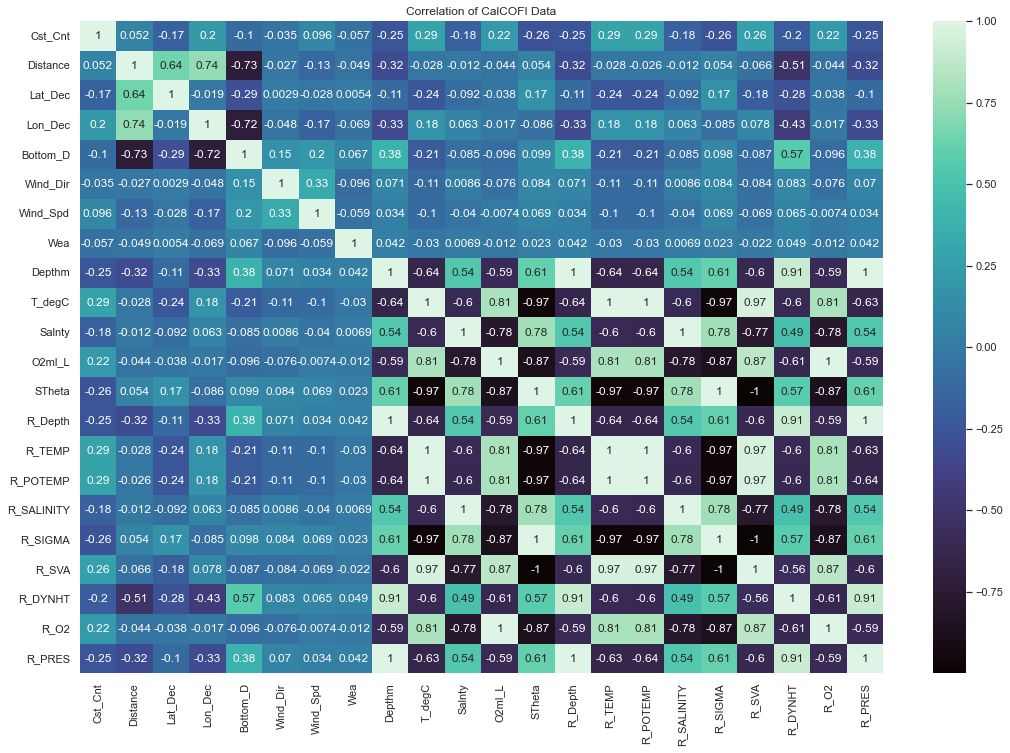

In [23]:
correlation = cast_data.corr()
f, ax = plt.subplots(figsize=(18,12))
sns.heatmap(correlation, annot=True, cmap="mako")
ax.set_title('Correlation of CalCOFI Data')

## 3. Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

In [24]:
# Before I create the model, I want to check the variance on my dataset:
bottle_df.var(numeric_only=True)

Cst_Cnt       1.111552e+08
Depthm        9.302813e+04
T_degC        1.777716e+01
Salnty        2.113314e-01
O2ml_L        4.269266e+00
STheta        1.016416e+00
R_Depth       9.302813e+04
R_TEMP        1.777719e+01
R_POTEMP      1.791714e+01
R_SALINITY    2.113327e-01
R_SIGMA       1.016229e+00
R_SVA         8.754583e+03
R_DYNHT       1.455304e-01
R_O2          4.269326e+00
R_PRES        9.504098e+04
dtype: float64

In [25]:
# prepare my X and y:
X = bottle_df['Salnty'].values
y = bottle_df['T_degC'].values

In [26]:
# Ensuring objects are arrays:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [27]:
#Ensuring objects have identical shape:
y = y.reshape(-1,1)
X = X.reshape(-1,1)

In [28]:
# Split into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

#I chose not to standardize data because variance was pretty low across the dataset:

#instantiate the classifier and fit the model:
lr = LinearRegression()
lr.fit(X_train, y_train)

#predict new values with sklearn's linear regression .predict function and store as an array
y_pred = lr.predict(X_test)
y_pred

array([[14.35201792],
       [11.46345539],
       [10.21097468],
       ...,
       [ 7.52114525],
       [15.65995904],
       [ 9.24041767]])

Yes, I can predict values with the model. But how accurate are they? Let's now determine accuracy scores with .score and cross_val_score.

In [29]:
# Accuracy score for the model using sklearn.linear_model .score:
accuracy=lr.score(X_test, y_test)
accuracy

0.2562134589396321

In [31]:
# Accuracy score for the model by taking the mean of scores from
# sklearn.model_selection .cross_val_score:
cross_val_accuracy = cross_val_score(lr, X, y, cv=5)
np.mean(cross_val_accuracy)

0.23612657881157945

## 4. Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics. 

In [32]:
#R^2: this is the value produced by sklearn.linear_model.LinearRegression.score()
# in the cell above, but here I will use sklear.metrics.r2_score:
rsq = r2_score(y_test, y_pred)

#mean squared error
mse = mean_squared_error(y_test, y_pred)

print("MSE = "+str(mse))
print("R^2 value = "+str(rsq))

MSE = 13.196079947053924
R^2 value = 0.2562134589396321


My mean squared error, or residual error, is extremely low given the terrible accuracy of the model. The R-squared value, or the fraction of what we got right, is not affected by scaling the data so should be more accurate for us with this particular model. Because r-squared is a fraction of a whole, the whole being perfect correlation, the closer the number is to 1, or 100%, the better your model's predictions correlate to truth. Mine is a disappointing 26% and should not be relied upon to predict water temperature accurately. Or at all, really. :/ 

## 5. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

In [33]:
# To pass my ndarrays to Seaborn, I need to make one dataset from them first:

# Converting my two 1D arrays into a single 2D array:
one_array = np.column_stack((X_test,y_pred))

# Make a dataframe from the 2D array:
prediction_data = pd.DataFrame(one_array, columns=['test_salinity','pred_temp'])
prediction_data.head(2)

,test_salinity,pred_temp
0,33.092,14.352018
1,33.717,11.463455


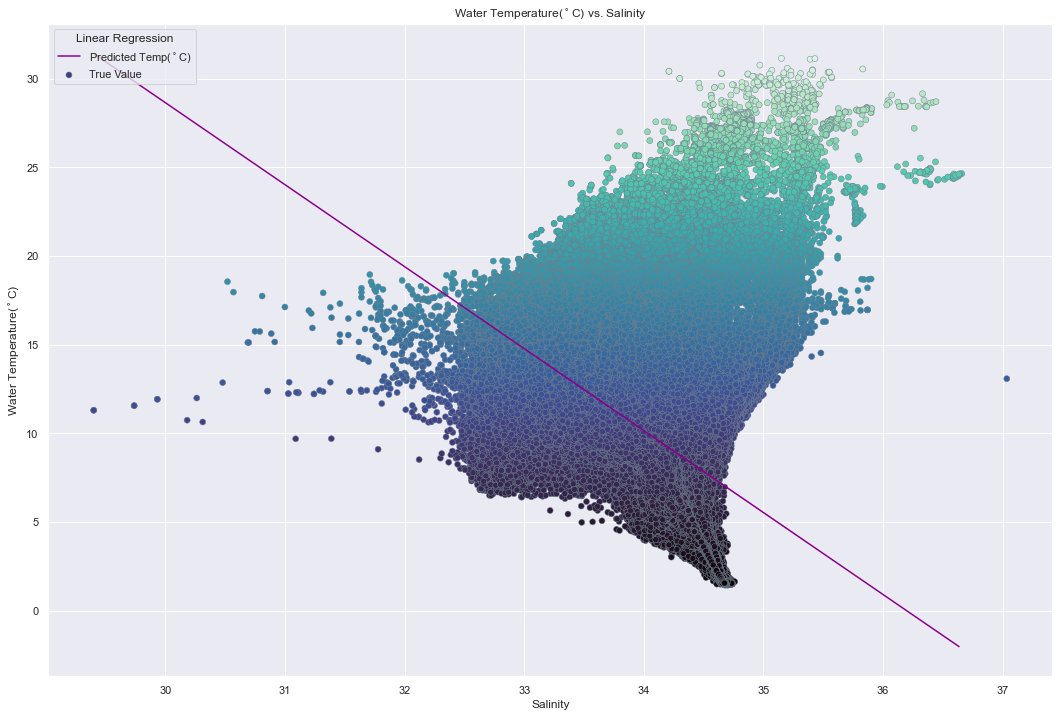

In [35]:
#Plotting the data using sns:
plt.figure(figsize=(18,12))
sns.scatterplot(data=bottle_df, x='Salnty', y='T_degC', hue='T_degC', palette='mako', legend=False,edgecolor='slategray')
plt.title('Water Temperature($^\circ$C) vs. Salinity')
plt.xlabel('Salinity')
plt.ylabel('Water Temperature($^\circ$C)')

#Plotting the prediction:
sns.lineplot(data= prediction_data, x='test_salinity', y='pred_temp', color='darkmagenta', legend='brief')
plt.legend(title='Linear Regression', loc='upper left', labels=['Predicted Temp($^\circ$C)','True Value'])
plt.show();

## 6. Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 

Polynomial regression is a method of adding polynomial terms to a linear dataset. It is simply creating new features by raising the values of one feature by an exponent -usually 2 or 3. When numerical input values are transformed in this way, the probability distribution changes. The smaller values get pulled further from the large ones. This can help your algorithms detect nonlinear patterns and make better predictions. Linear regression can usually be aided by the addition of polynomial input variables. However, powers of degrees greater than 4 can create a new curve that is too flexible and weirdly shaped, ruining any advantage in pattern identification. So, if you have a linear dataset and are trying to get more accuracy in your predictive model, a polynomial feature transform of a small degree or ***polynomial regression*** might help. 

## 7. Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

In [48]:
# instantiate my polynomial features object:
pn = PolynomialFeatures(degree = 2, include_bias=False)

#create new variables based off my previous t_t_s:
X_train_pn = pn.fit_transform(X_train)
X_test_pn = pn.fit_transform(X_test) 

# use linear regression on the model that should now have polynomial features:
pn.fit(X_train_pn,y_train)
lr_pn = LinearRegression()
lr_pn.fit(X_train_pn, y_train)

# create new y predictions with the X_test polynomials:
y_pn_pred = lr_pn.predict(pn.fit_transform(X_test))
y_pn_pred

array([[15.09932931],
       [11.02179675],
       [ 9.79430494],
       ...,
       [ 8.2632671 ],
       [17.51765686],
       [ 9.06796773]])

In [45]:
#R^2
pn_rsq = r2_score(y_test, y_pn_pred)

#mean squared error
pn_mse = mean_squared_error(y_test, y_pn_pred)

print("MSE = "+str(pn_mse))
print("R^2 value = "+str(pn_rsq))

MSE = 12.806038200242144
R^2 value = 0.27819785149365306


The metrics did not significantly improve.

## 8. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved.

In [53]:
# prepare the modeled data for visualization:

# To pass my ndarrays to Seaborn, I need to make one dataset from them first:

# Converting my two 1D arrays into a single 2D array:
one_array = np.column_stack((X_test,y_pn_pred))

# Make a dataframe from the 2D array:
polynomial_data = pd.DataFrame(one_array, columns=['salinity','pn_pred_temp'])
polynomial_data.head(2)

,salinity,pn_pred_temp
0,33.092,15.099329
1,33.717,11.021797


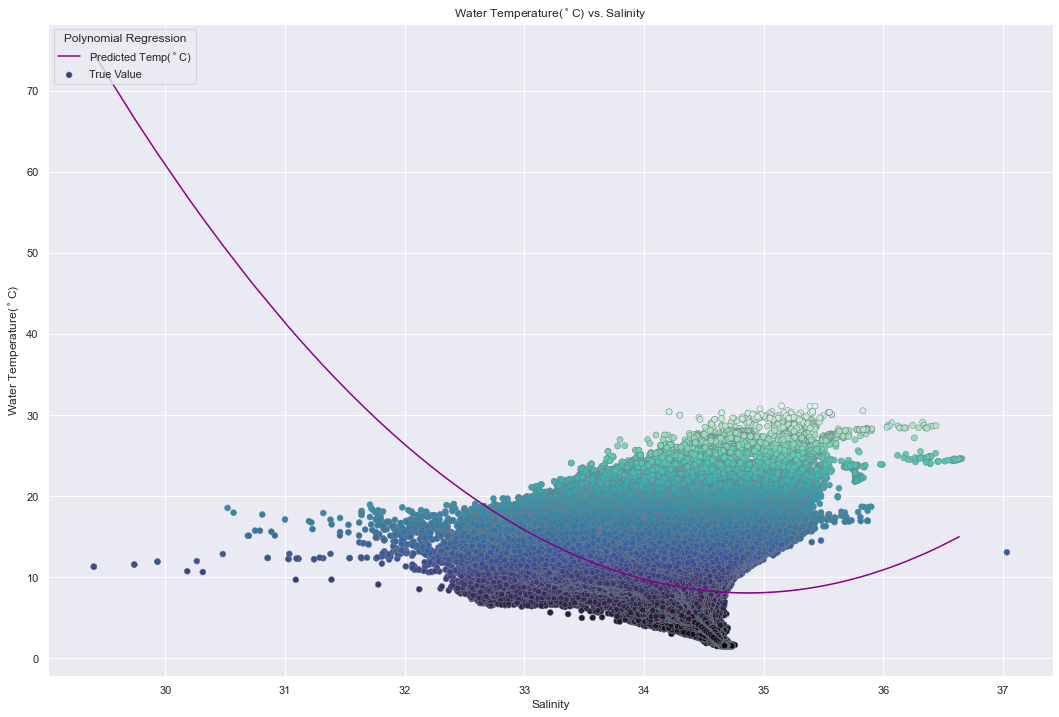

In [54]:
#Plotting the data using sns:
plt.figure(figsize=(18,12))
sns.scatterplot(data=bottle_df, x='Salnty', y='T_degC', hue='T_degC', palette='mako', legend=False, edgecolor='slategray')
plt.title('Water Temperature($^\circ$C) vs. Salinity')
plt.xlabel('Salinity')
plt.ylabel('Water Temperature($^\circ$C)')

#Plotting the prediction:
sns.lineplot(data= polynomial_data, x='salinity', y='pn_pred_temp', color='darkmagenta', legend='brief')
plt.legend(title='Polynomial Regression', loc='upper left', labels=['Predicted Temp($^\circ$C)','True Value'])
plt.show();

### For validation, I will use Seaborn's regression functionality to check my regression curve:

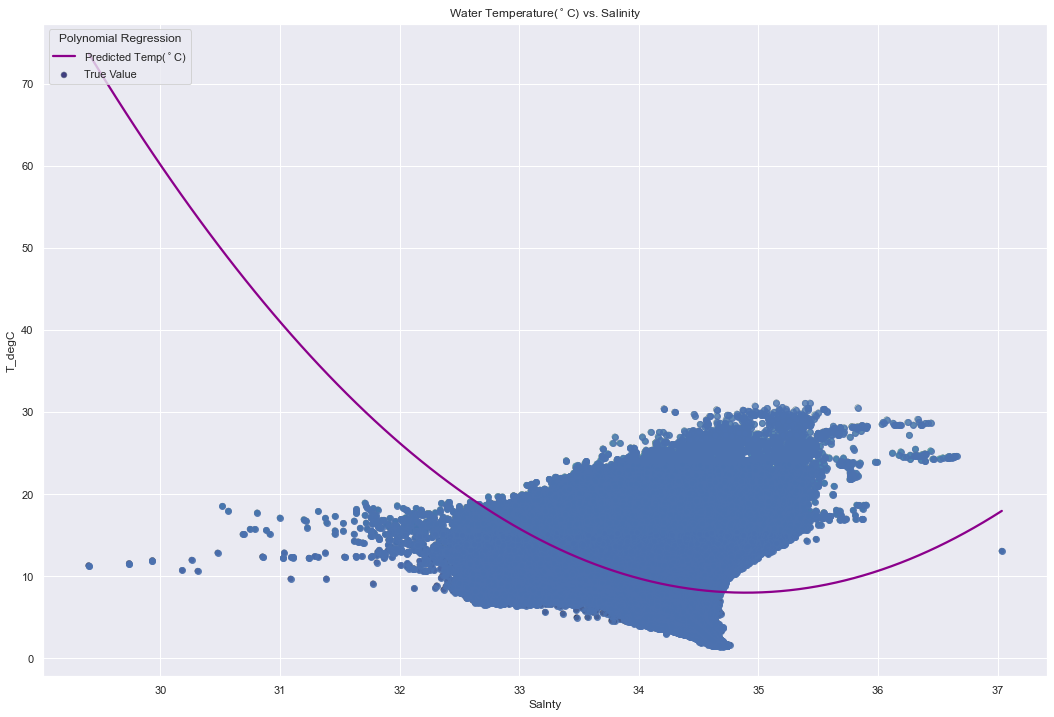

In [58]:
# Using Seaborn to create a scatter plot of the data:
plt.figure(figsize=(18,12))
sns.scatterplot(data=bottle_df, x='Salnty', y='T_degC', hue='T_degC', palette='mako', legend=False, edgecolor='slategray')
plt.title('Water Temperature($^\circ$C) vs. Salinity')
plt.xlabel('Salinity')
plt.ylabel('Water Temperature($^\circ$C)')

# Using Seaborn to create a polynomial regression line to the 2nd degree:
sns.regplot(data=bottle_df, x='Salnty', y='T_degC', order=2, line_kws={"color": "darkmagenta"}, ci=None)
plt.legend(title='Polynomial Regression', loc='upper left', labels=['Predicted Temp($^\circ$C)','True Value'])

plt.show();

The regression curve lines match. I have visualized the data correctly.

# DataCamp Completions:

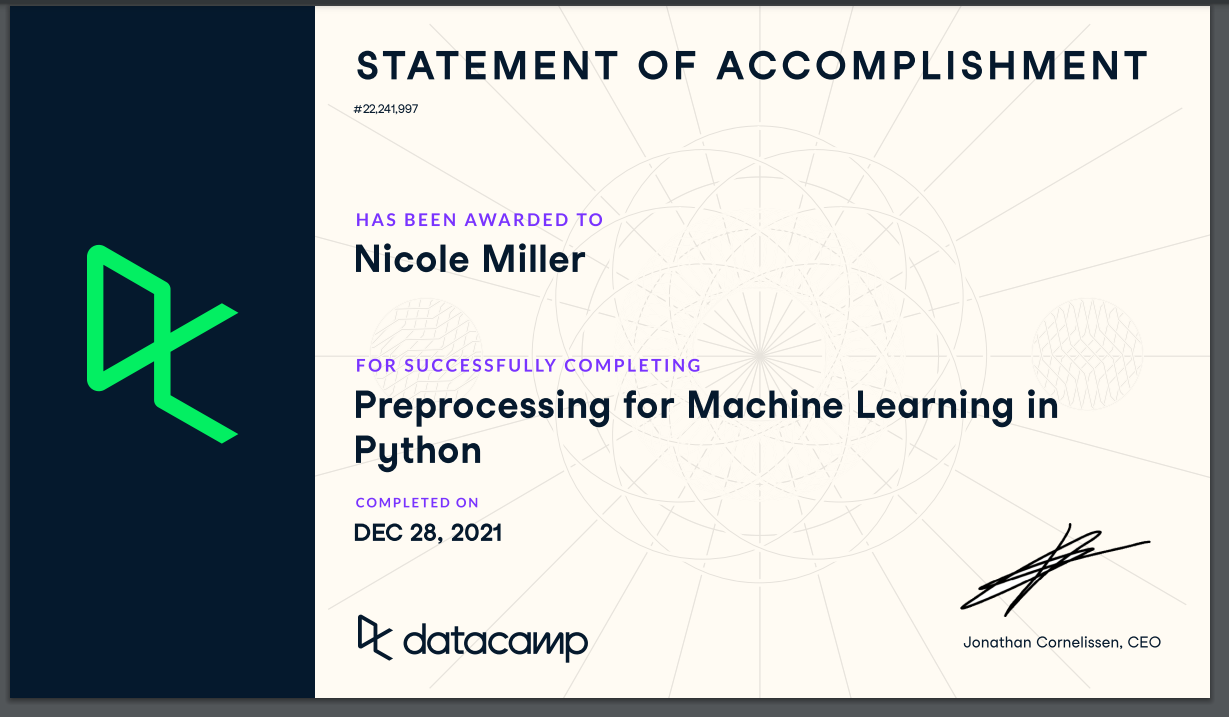

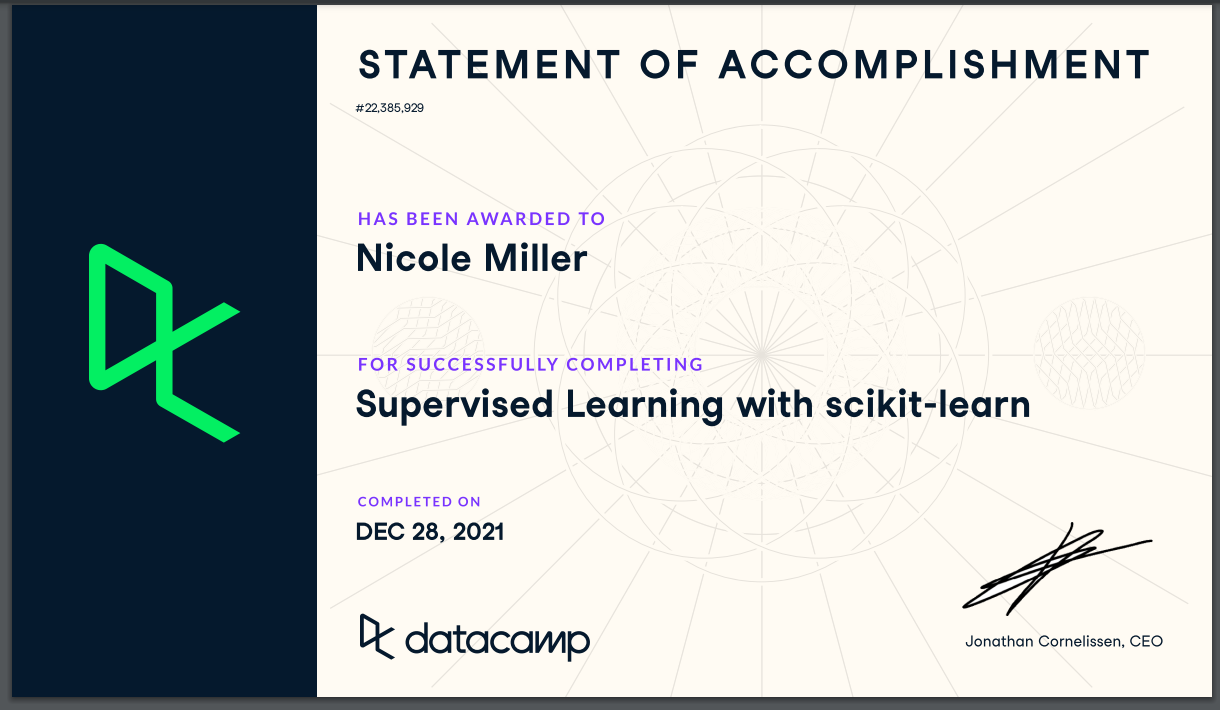